In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy

data = pd.read_excel("AMC3_Gruppe_23_WS25.xlsx",sheet_name=None)
CMC = data["CMC"]
auheizen = data["Aufheizen"]
reaktionsverlauf = data["Reaktion"]

# Berechnen der kritischen Mizellenkonzentration

"Es wurde eine CMC von 2.426 g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um 1.075 % ab


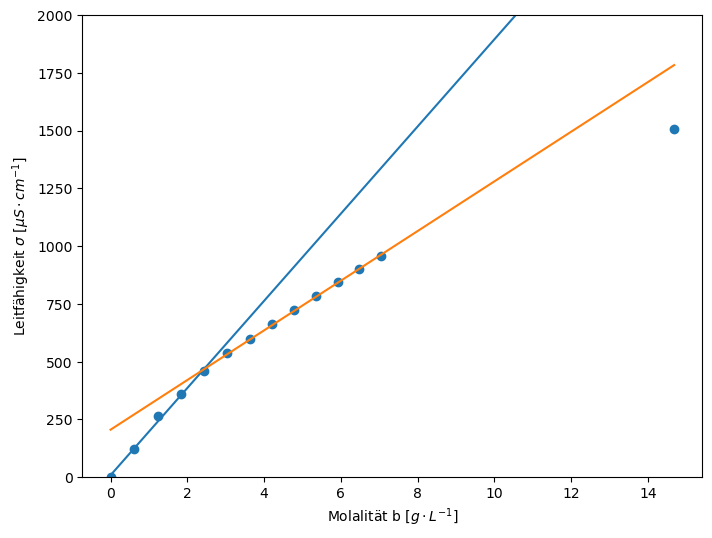

In [86]:
fig, ax = plt.subplots(figsize=(8,6))

# TODO: Hier checken was die actual eingewogenen werte waren
m_SDS = 3.039 #g
V_SDS = 27e-3 # L
b_SDS = m_SDS/V_SDS # g.L^-1


V_SDS_zugegeben = np.concat([np.arange(0,13),[27]]) * 1e-3 

V_probe = 180e-3 + V_SDS_zugegeben # L
c_SDS = V_SDS_zugegeben*b_SDS / V_probe

CMC_lit = 2.4 # g.L^-1

leitfaehigkeit = np.delete(CMC["Value"],7) # Entferne Doppelten Messwert
plt.scatter(c_SDS,leitfaehigkeit)

ausgleich1 = scipy.stats.linregress(c_SDS[:5],leitfaehigkeit[:5])
ausgleich2 = scipy.stats.linregress(c_SDS[4:-1],leitfaehigkeit[4:-1])
ax.plot(c_SDS, ausgleich1.slope * c_SDS + ausgleich1.intercept)
ax.plot(c_SDS, ausgleich2.slope * c_SDS + ausgleich2.intercept)
ax.set_ylim(0,2000)
ax.set_xlabel("Molalität b [$g\cdot L^{-1}$]")
ax.set_ylabel("Leitfähigkeit $\sigma$ [$\mu S\cdot cm^{-1}$]")

def ausgleichs_schnitt(x):
    return (ausgleich1.slope * x + ausgleich1.intercept) - (ausgleich2.slope * x + ausgleich2.intercept)

CMC_gemessen = scipy.optimize.fsolve(ausgleichs_schnitt,2.4)[0]

print(f""""Es wurde eine CMC von {CMC_gemessen:.3f} g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um {100*CMC_gemessen/CMC_lit-100:.3f} % ab""")
